In [101]:
import pandas as pd
import numpy as np 
from sklearn.datasets import make_moons

In [192]:
x,y = make_blobs(n_samples=500,n_features=10)

In [193]:
x.shape,y.shape

((500, 10), (500,))

In [194]:
# Normalising data from mean = 0 and std = 1  
mu = np.mean(x,axis = 0)
sd = np.mean(x,axis = 0)
x_ = (x - mu)/sd

mu = np.mean(y)
sd = np.mean(y)
y_ = (y-mu)/sd

In [195]:
S = np.cov(x_.T)

In [196]:
u,s,v = np.linalg.svd(S)

In [197]:
s

array([2.04828512e+02, 5.97933069e+01, 6.90627316e-01, 3.64152650e-01,
       2.01634082e-01, 1.72797758e-01, 1.08129617e-01, 8.71615658e-02,
       6.19415525e-02, 3.12881868e-02])

In [198]:
#converting it to 2D data
k = 2
pc = x_.dot(u[:,:k])

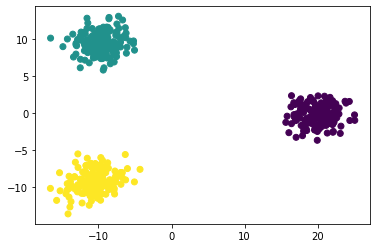

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(pc[:,0],pc[:,1],c=y)
plt.show()

In [200]:
#converting it to 3D data
k = 3
px = x_.dot(u[:,:k])

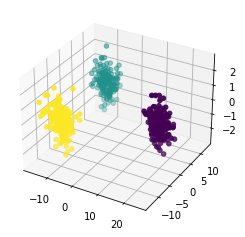

In [201]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(px[:,0], px[:,1], px[:,2],c = y);

Trying on MNIST dataset

In [202]:
from keras.datasets import mnist

In [203]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [204]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [205]:
def dispimp(x,y):
    m = x.shape[0]
    i = np.random.randint(m)
    xi = x[i].reshape(28,28)
    plt.imshow(xi,cmap='gray')
    plt.axis('off')
    plt.title(y[i])
    plt.show()

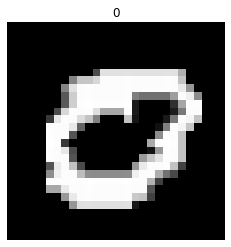

In [206]:
dispimp(x_train,y_train)

In [207]:
x = x_test.reshape(-1,784)
y = y_test.flatten()

In [208]:
mu = np.mean(x,axis = 0)
sd = np.std(x,axis = 0)
x_ = (x-mu)/sd  #having problem with this 

C:\Users\saksh\AppData\Local\Temp/ipykernel_8336/4053888907.py:3: RuntimeWarning: invalid value encountered in true_divide
  x_ = (x-mu)/sd  #having problem with this


In [209]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_ = sc.fit_transform(x)

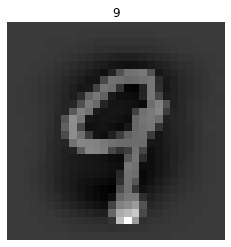

In [210]:
dispimp(x_,y)

In [211]:
S = np.cov(x_.T)
u,s,v = np.linalg.svd(S)

In [212]:
u[:,2].shape,x_.shape

((784,), (10000, 784))

In [230]:
k = 2 
zpc = x_.dot(u[:,:k])
zpc

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

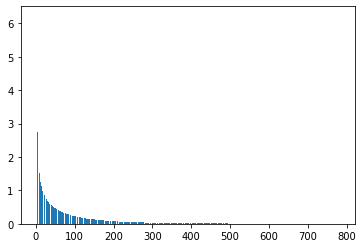

In [231]:
plt.bar( np.arange(len(s)),(s/np.sum(s))*100 )
plt.show()

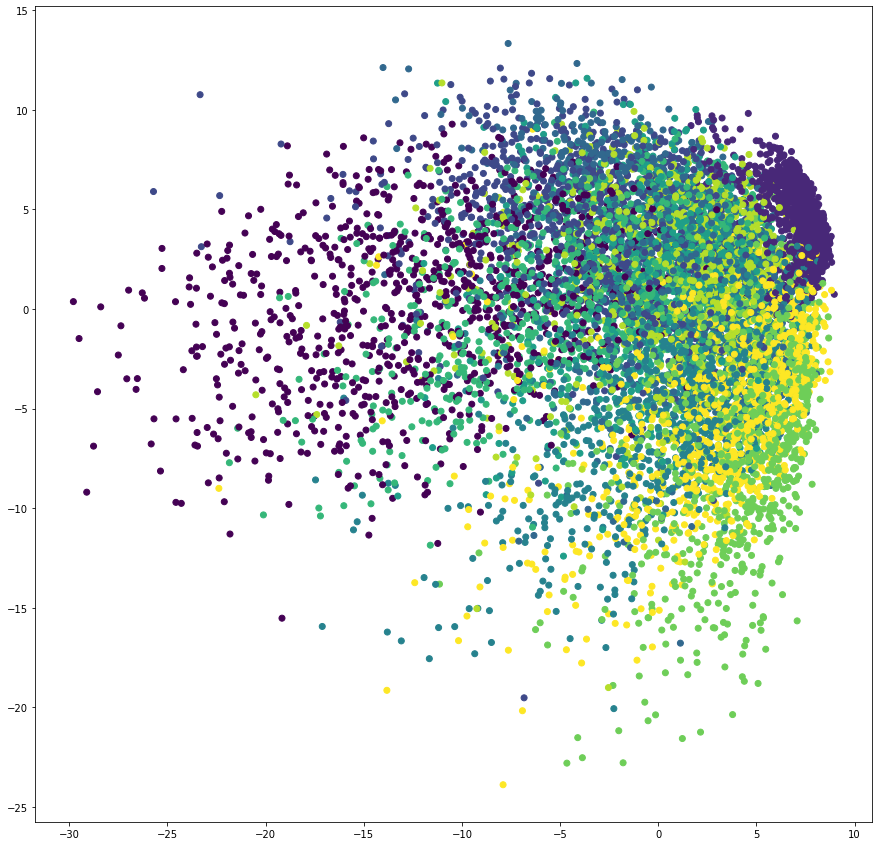

In [235]:
plt.figure(figsize=(15,15))
plt.scatter(zpc[:,0],zpc[:,1],c=y_test)
plt.show()

In [229]:
k = 3 
zpcn = x_.dot(u[:,:k])
zpcn

array([[  5.45831116,  -6.41400668,  -4.19942366],
       [ -2.80443233,   8.02885014,  16.18577955],
       [  7.41124146,   3.86404387,   1.08959777],
       ...,
       [  5.00435204,  -1.15364641,  -5.01710348],
       [  1.42085442,   4.42308066,  -7.00728815],
       [-13.14268302,   4.26280299,  -1.14624747]])

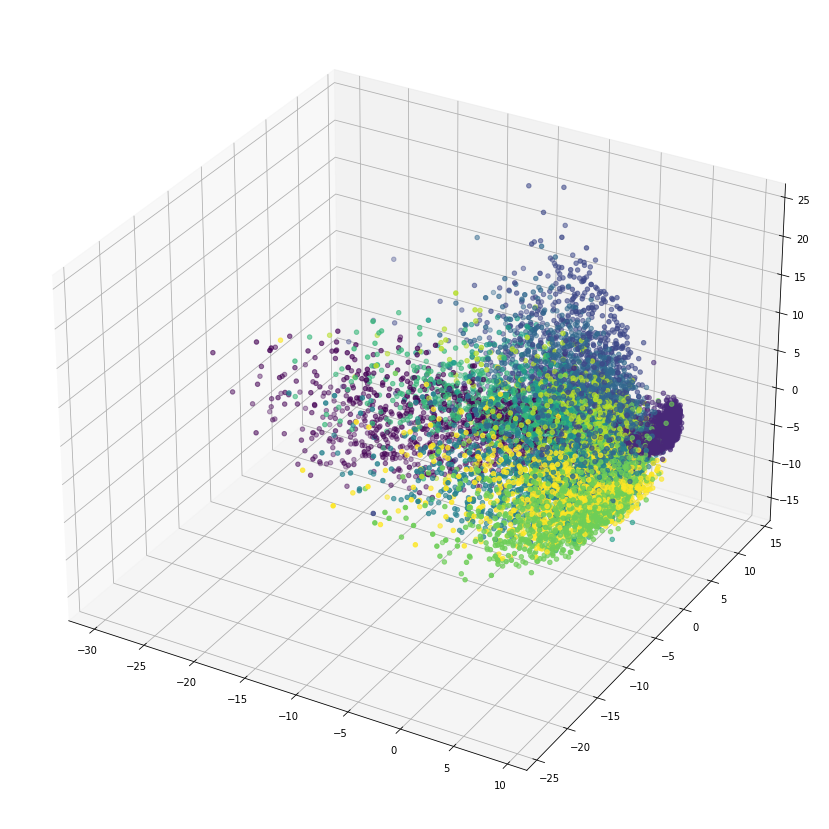

In [239]:
%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(zpcn[:,0], zpcn[:,1], zpcn[:,2],c = y_test);

Trying Sklearn PCA

In [240]:
from sklearn.decomposition import PCA

In [241]:
pca = PCA(n_components = 2)

In [245]:
pca.fit_transform(x_)

array([[-5.45828905,  6.41366608],
       [ 2.80451451, -8.0314054 ],
       [-7.41124304, -3.86392899],
       ...,
       [-5.00434147,  1.15425262],
       [-1.42087474, -4.42352697],
       [13.14268338, -4.26334124]])

In [246]:
pca.explained_variance_

array([41.39893397, 28.35105779])

In [247]:
pca = PCA()
skpc = pca.fit_transform(x_)

In [251]:
cumuv = np.cumsum(pca.explained_variance_/np.sum(pca.explained_variance_))

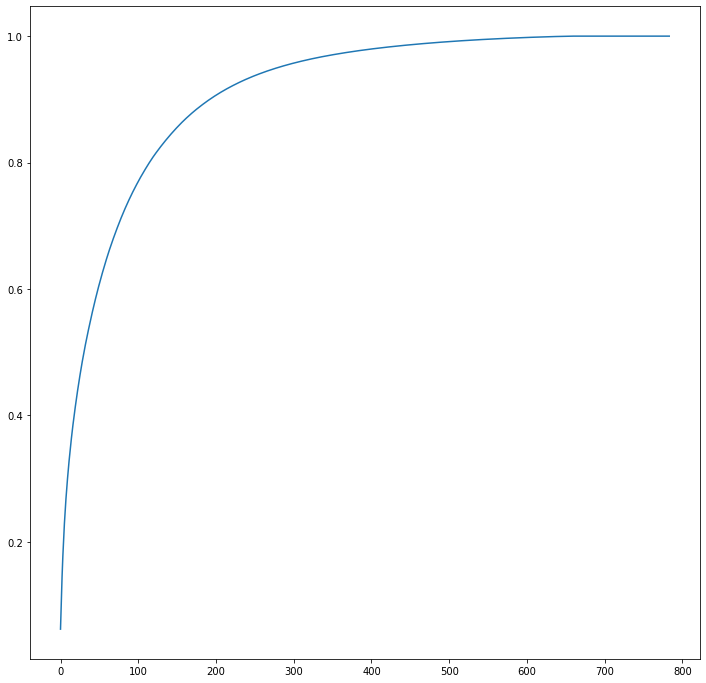

In [253]:
plt.figure(figsize=(12,12))
plt.plot(cumuv)
plt.show()

In [254]:
pca.explained_variance_

array([4.13989340e+01, 2.83510581e+01, 2.70196465e+01, 2.15824995e+01,
       1.84057252e+01, 1.60945634e+01, 1.36639090e+01, 1.25807315e+01,
       1.11624006e+01, 1.01380790e+01, 9.83450164e+00, 8.75790204e+00,
       8.38544770e+00, 7.97784570e+00, 7.64886637e+00, 7.31512409e+00,
       6.89333872e+00, 6.64082579e+00, 6.32396933e+00, 6.08974669e+00,
       5.94234357e+00, 5.78338241e+00, 5.65926201e+00, 5.48906732e+00,
       5.25427495e+00, 5.14680013e+00, 5.05462485e+00, 4.89770948e+00,
       4.73536524e+00, 4.56603235e+00, 4.46677346e+00, 4.37046128e+00,
       4.32323658e+00, 4.15557409e+00, 4.03609421e+00, 3.95423005e+00,
       3.88875015e+00, 3.82939953e+00, 3.77880871e+00, 3.69226086e+00,
       3.68222396e+00, 3.66141824e+00, 3.56686939e+00, 3.47145867e+00,
       3.42387456e+00, 3.33512759e+00, 3.32686280e+00, 3.26786201e+00,
       3.19850249e+00, 3.13279782e+00, 3.07617536e+00, 3.03401082e+00,
       2.97856834e+00, 2.94000449e+00, 2.89943744e+00, 2.83019996e+00,
      